## Step 1) Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Step 2) Importing dataset

In [2]:
train = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Flip Robo/Practice Projects/termdeposit_train.csv")
test = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Flip Robo/Practice Projects/termdeposit_test.csv")

### Creating copy of the dataset

In [3]:
train_df = train.copy()
test_df = test.copy()

In [4]:
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


#### Observation:
#### No of rows = 31647, No of Columns = 18
#### ID, age, balance, day, duration, campaign, pdays, previous seems to be int type and others str type

In [5]:
train_df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


## Step 3) Exploratory Data Analysis

### Checking the shape of data

In [6]:
train_df.shape

(31647, 18)

### Checking the data types

In [7]:
train_df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

### Observation: 2 types of data are present object and int job, marital, education, default, housing, loan, contact, month,poutcome,subscribed are object datatype and others are int

### Checking the Basic Info

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


### Observation: Does not seem to have null values, memory usage 4.3MB

### Checking Null Values

In [9]:
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

### Checking unique values

In [10]:
train_df.nunique().to_frame('No of Unique Values')

,No of Unique Values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [11]:
### To identify the unique values in each column

In [12]:
for col in train_df.select_dtypes(include='object').columns:
    print(col)
    print(train_df[col].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']


#### Observation:
#### Unique values in job, month = 12, marital,contact = 3, education, poutcome = 4, dafault = 2, housing, loan, subscribed = 2

### Checking duplicate values

In [13]:
train_df.duplicated().sum()

0

#### Observation: No duplicate values

In [14]:
cat_feat=[col for col in train_df.select_dtypes(include='object').columns if (col not in ['subscribed'])]
print(cat_feat)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


### Step 4) Visualization of Data

### Univariate Analysis of Categorical Data

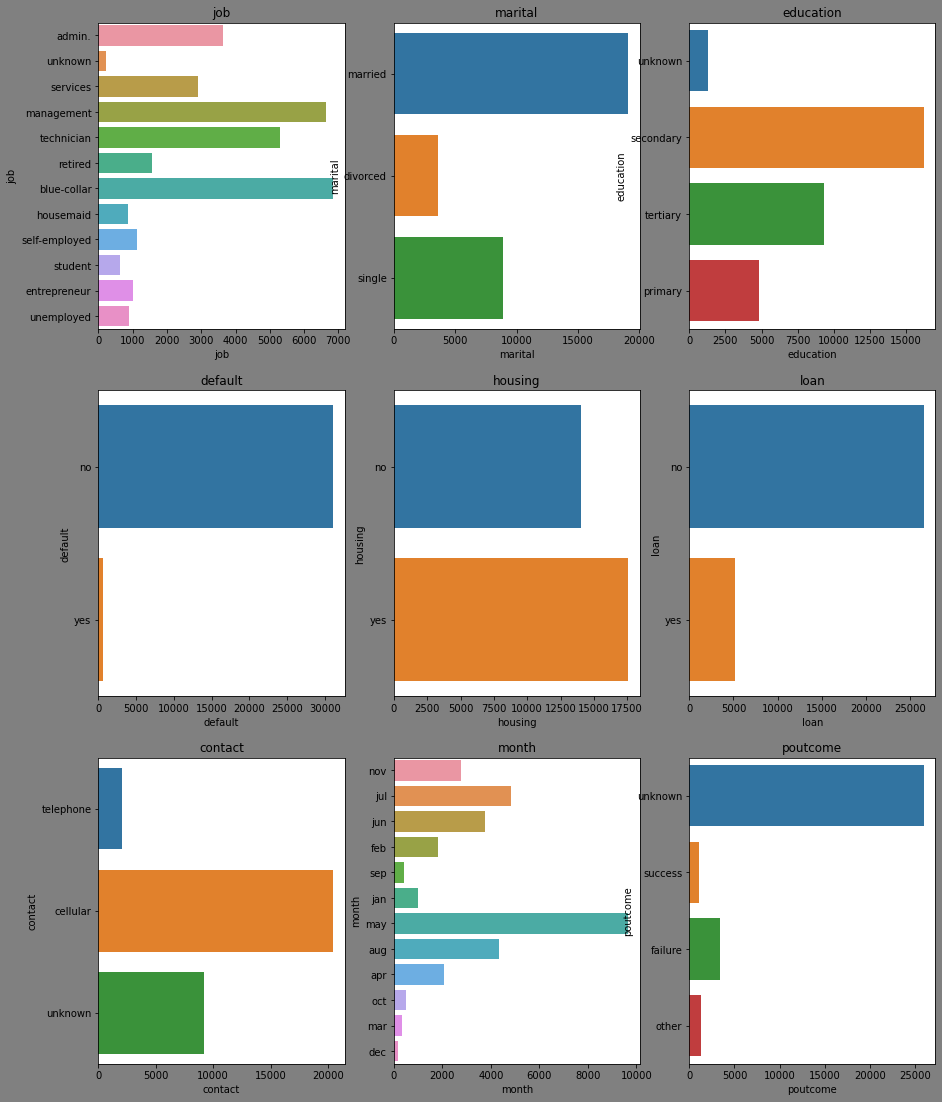

In [15]:
plt.figure(figsize=(15,80), facecolor='grey')
plotnumber=1
for cat_feat in cat_feat:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_feat,data=train)
    plt.xlabel(cat_feat)
    plt.title(cat_feat)
    plotnumber+=1
plt.show()  

#### Observations
#### Maximum no of people work in blue color job
#### Least no of people work is unknown
#### Max clients are married and least are divorsed
#### Max no of clients have done secondary education
#### Negligible clients have credit default
#### Majority client have no loan
#### Majority client were contacted via cellular method
#### Max client outcome of previous marketing campaign is unknown

### Relation betn Categorical and Target Variable

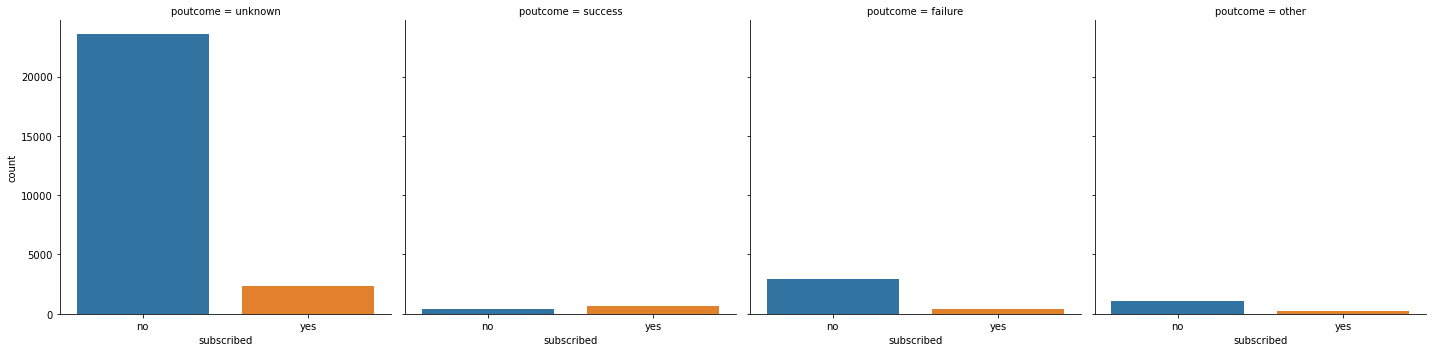

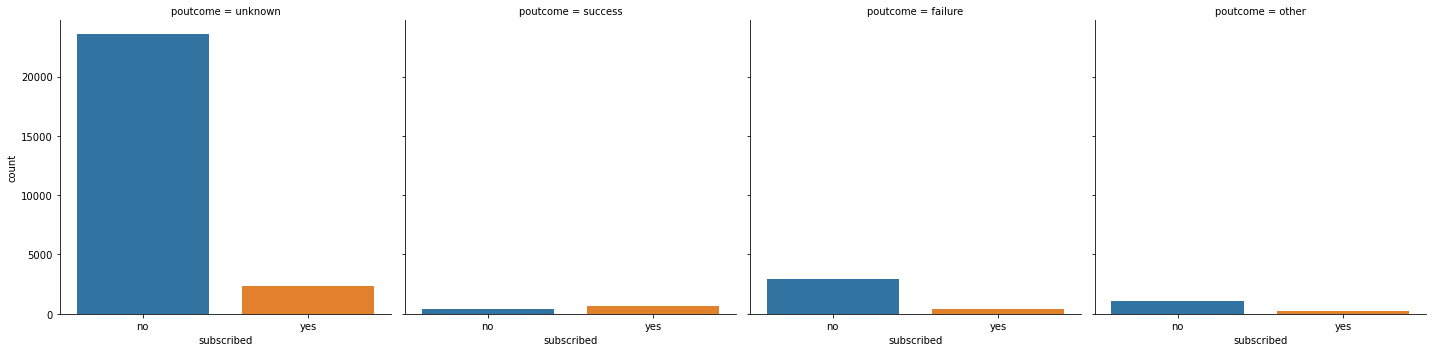

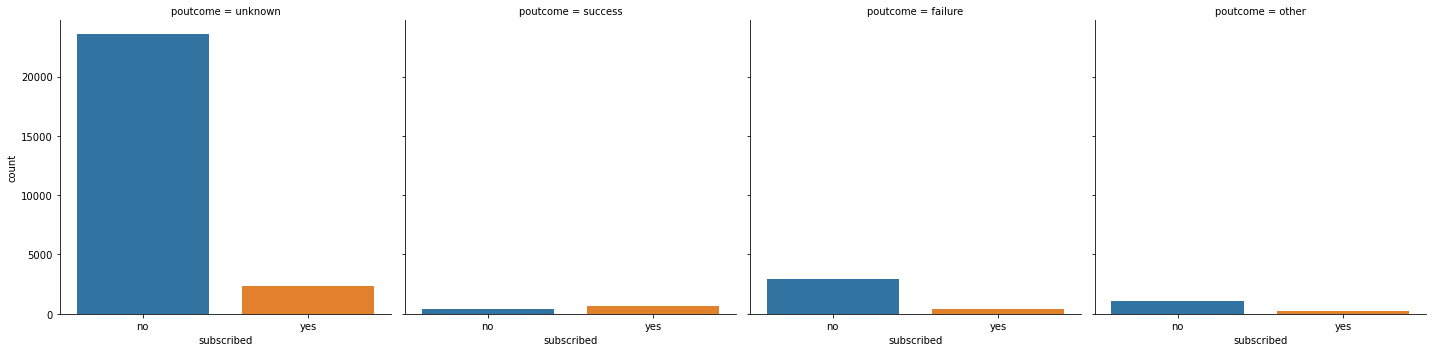

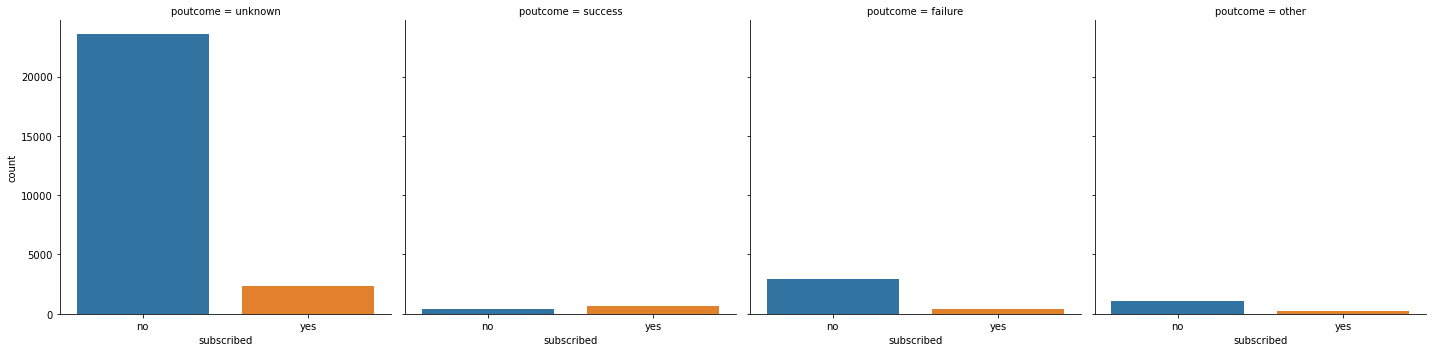

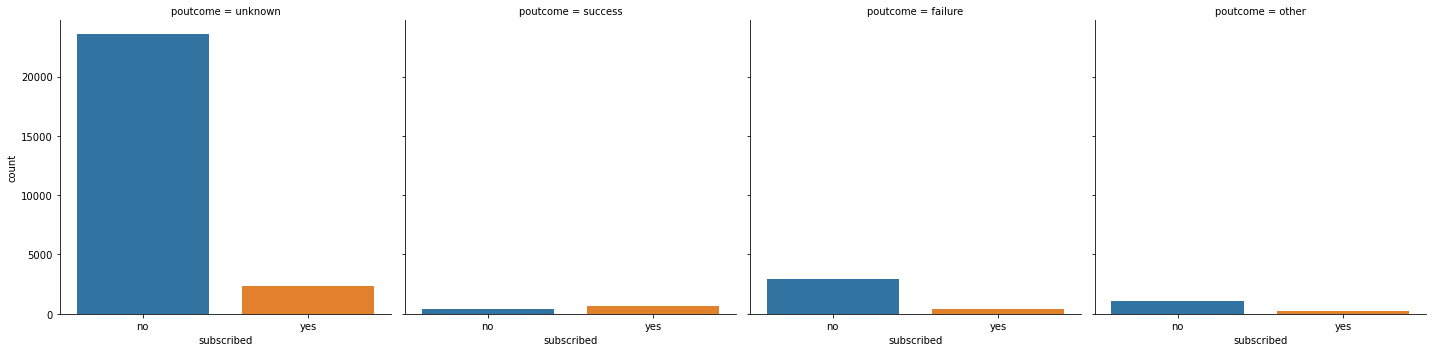

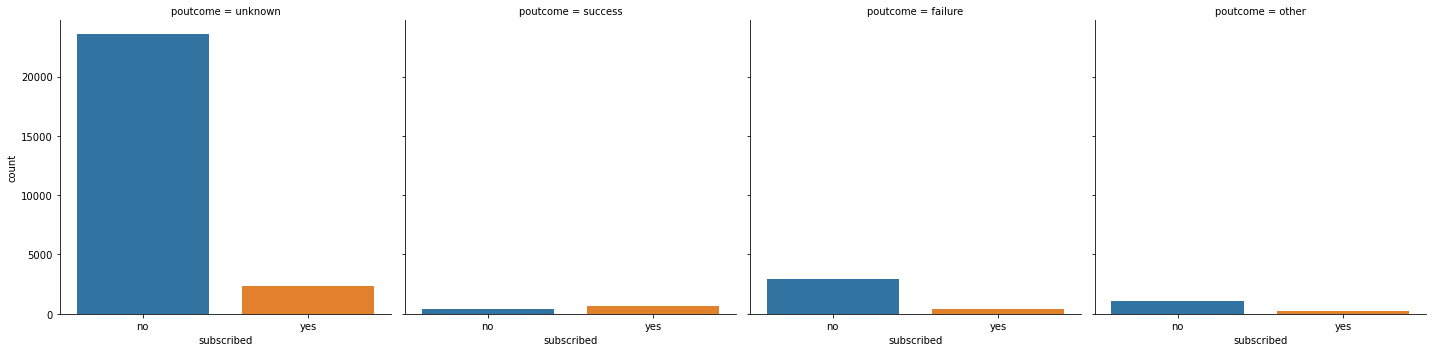

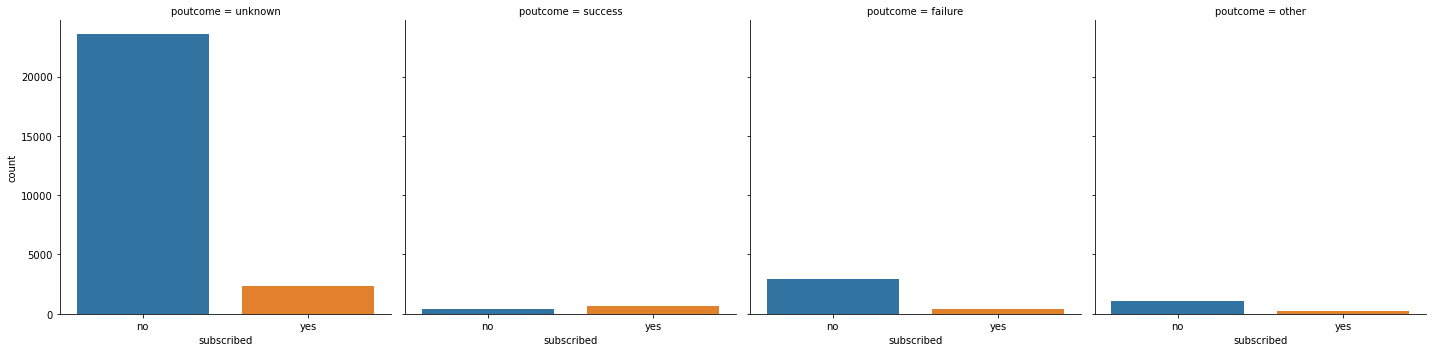

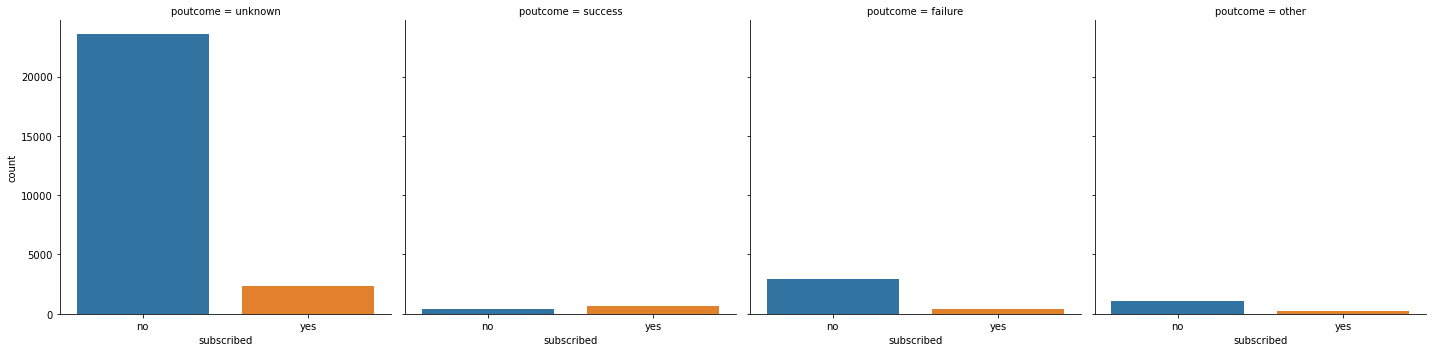

In [16]:
for i in cat_feat:
    sns.catplot(x='subscribed',col=cat_feat, kind='count', data=train_df)
plt.show()

#### Observation: In all the cases as per abv graph the chance of client availing the Term Deposit is very less

In [17]:
for i in cat_feat:
    print(train_df.groupby(['subscribed',cat_feat]).size())

subscribed  poutcome
no          failure      2931
            other        1071
            success       374
            unknown     23556
yes         failure       431
            other         217
            success       694
            unknown      2373
dtype: int64
subscribed  poutcome
no          failure      2931
            other        1071
            success       374
            unknown     23556
yes         failure       431
            other         217
            success       694
            unknown      2373
dtype: int64
subscribed  poutcome
no          failure      2931
            other        1071
            success       374
            unknown     23556
yes         failure       431
            other         217
            success       694
            unknown      2373
dtype: int64
subscribed  poutcome
no          failure      2931
            other        1071
            success       374
            unknown     23556
yes         failure       431
       

### Analysing Numerical Features

In [25]:
num_feat=[col for col in train_df.select_dtypes(include='integer').columns if (col not in ['subscribed'])]
print(num_feat)
print(type(num_feat))

['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
<class 'list'>


### Deleting the column ID as it is just a serial no

In [26]:
del num_feat[0]
print(num_feat)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


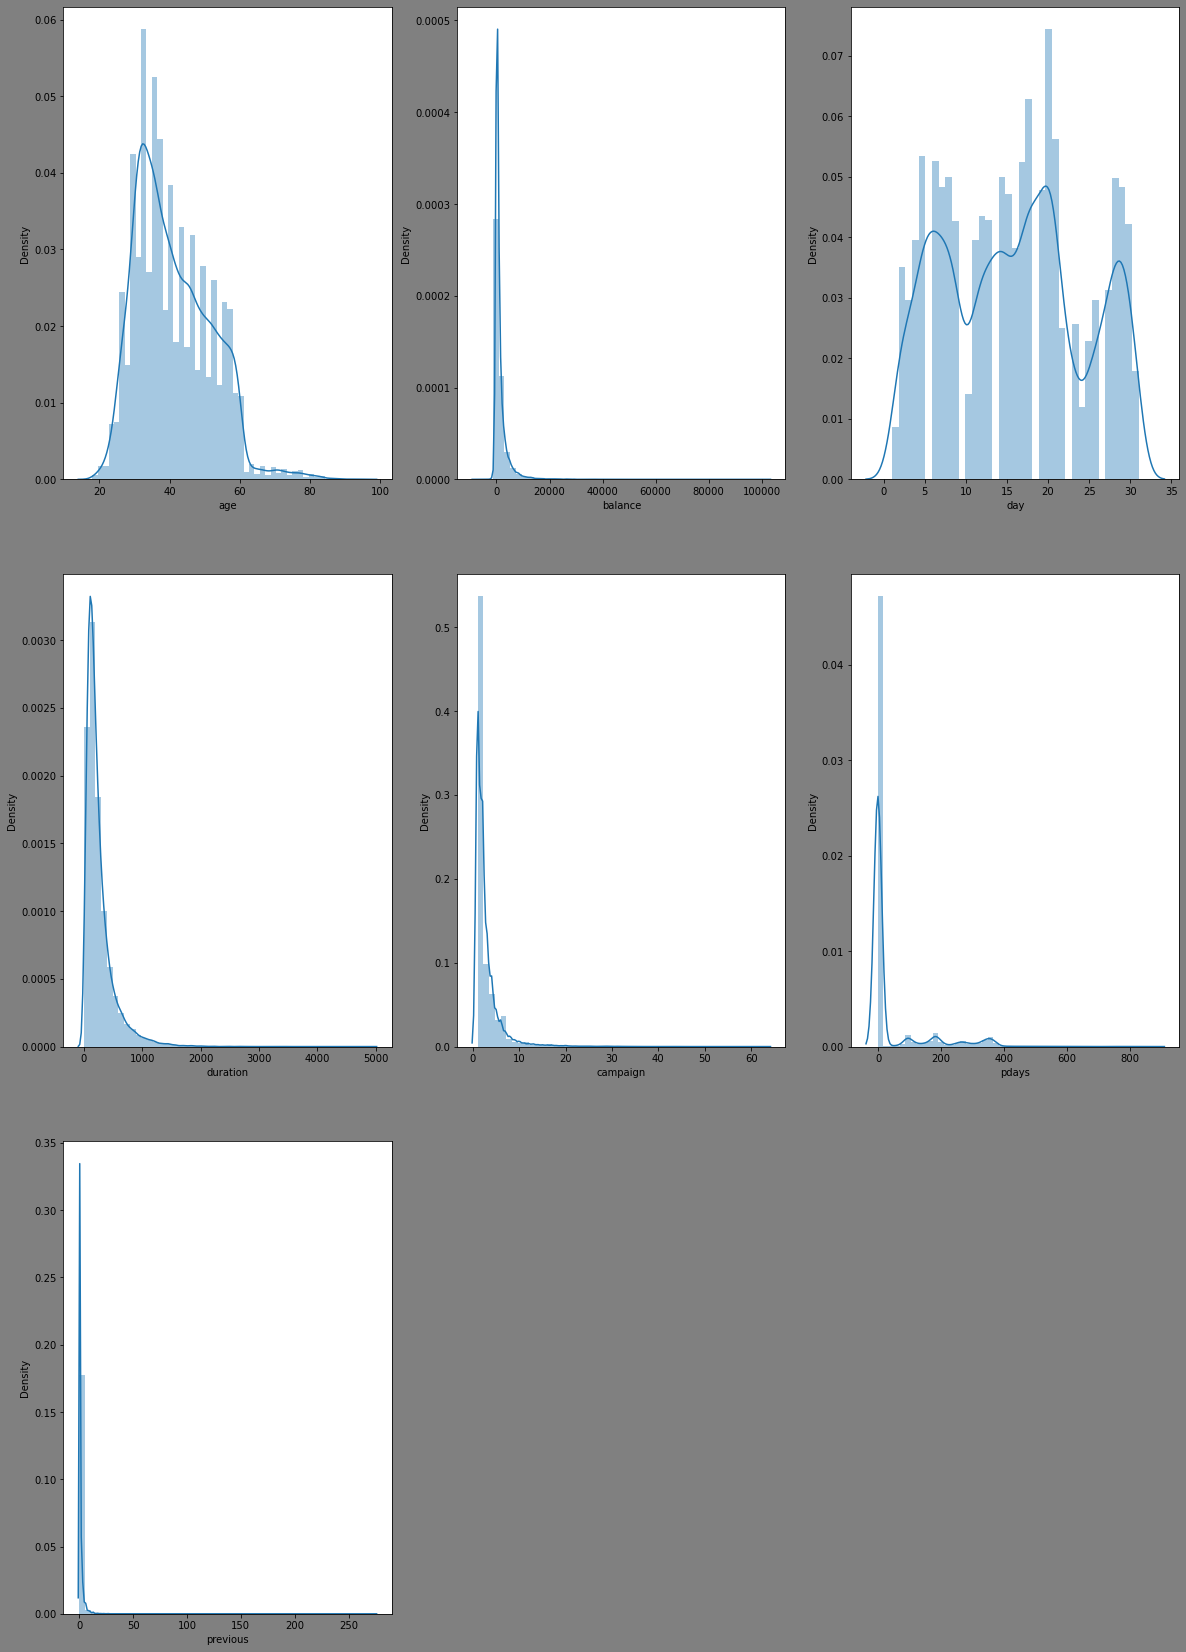

In [20]:
plt.figure(figsize=(20,40),facecolor='grey')
plotnumber=1
for num_feat in num_feat:
    ax=plt.subplot(4,3,plotnumber)
    sns.distplot(train_df[num_feat])
    plt.xlabel(num_feat)
    plotnumber+=1
plt.show()

#### Observation:
#### Duration, balance, campaign pdays and previous are right skewed

Relation betn Numerical features and Target Variable

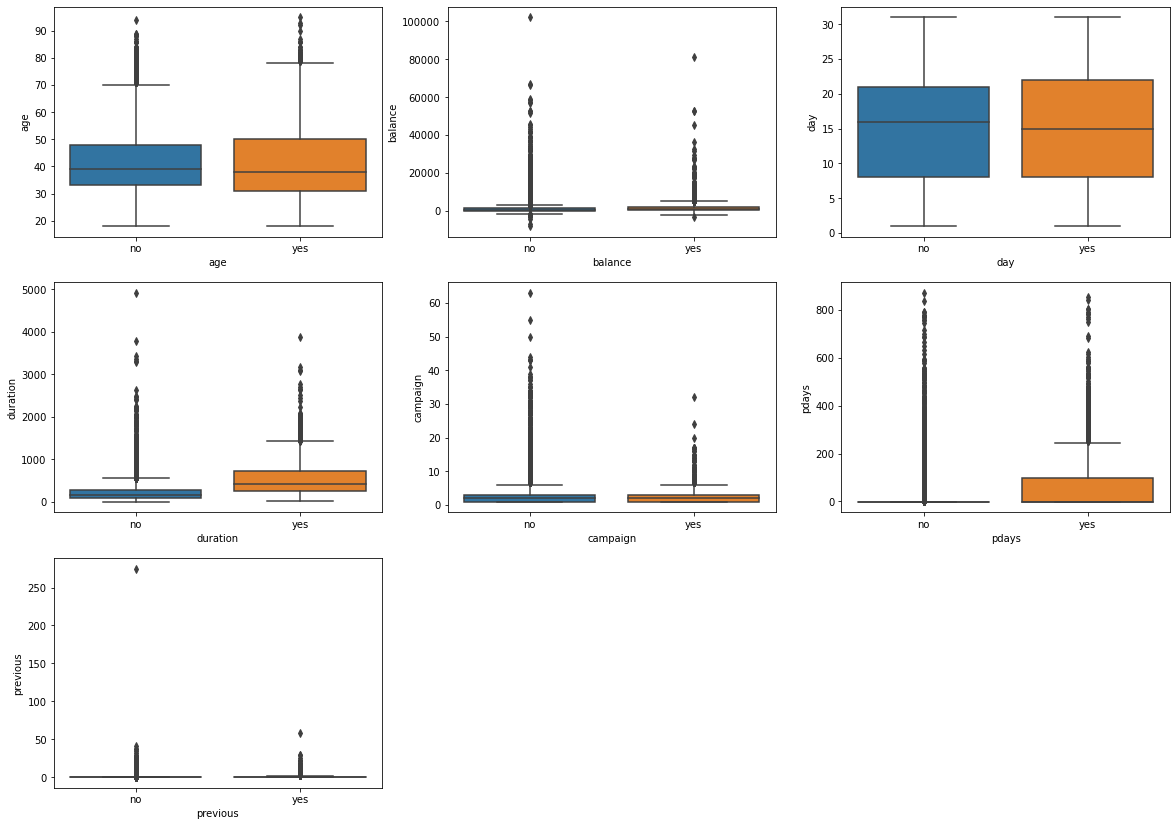

In [24]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for num_feat in num_feat:
    if plotnumber <= 8:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(x='subscribed',y=train_df[num_feat],data=train_df)
        plt.xlabel(num_feat)
    plotnumber+=1
plt.show()

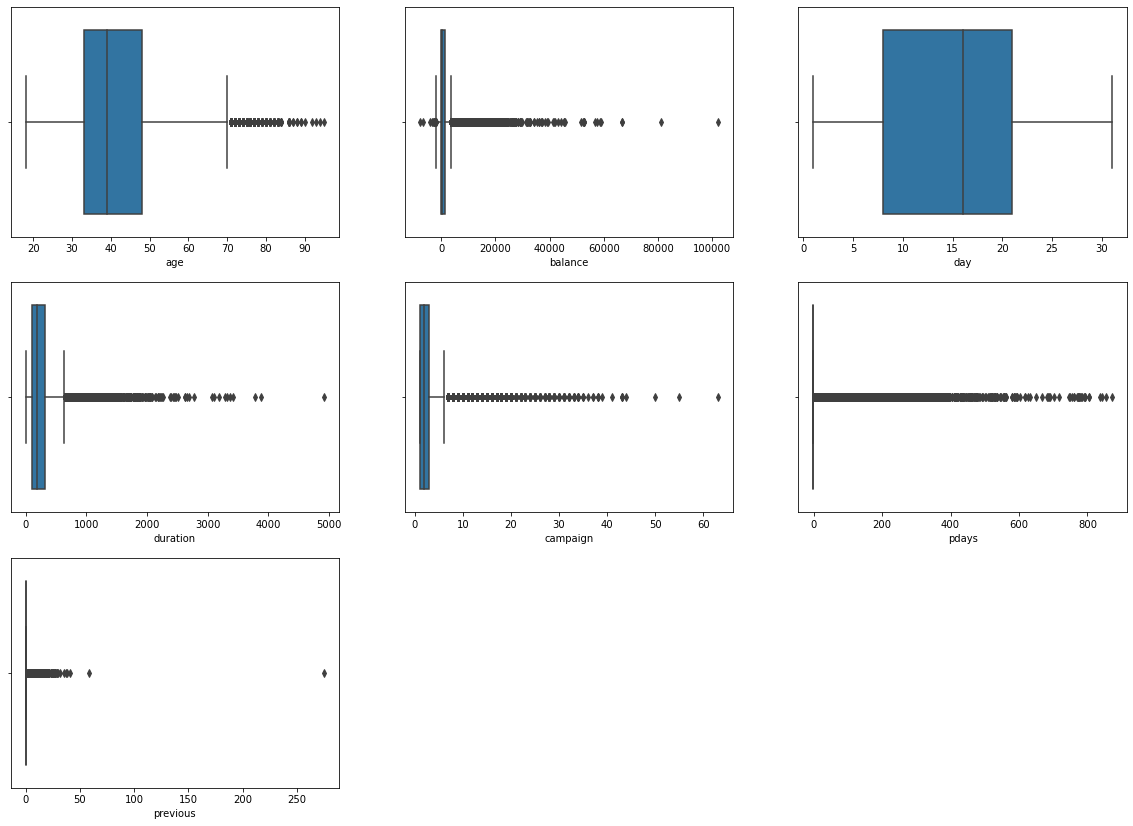

In [27]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber=1
for num_feat in num_feat:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(train_df[num_feat])
    plt.xlabel(num_feat)
    plotnumber+=1
plt.show()

#### Observation: age,balance,duration,campaign,pdays,previous has outliers

<AxesSubplot:>

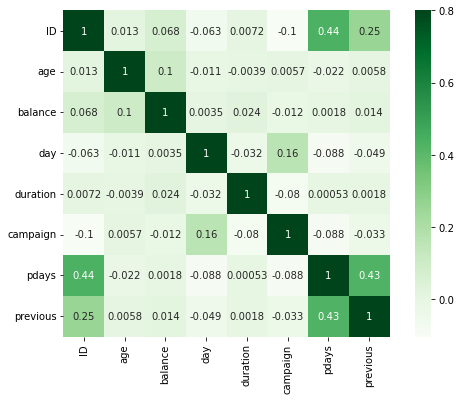

In [28]:
matrix=train_df.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="Greens",annot=True)

In [29]:
train_df['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

#### Observation : 88% client do not opt deposits

In [30]:
train_df['default'].value_counts(normalize=True)

no     0.981515
yes    0.018485
Name: default, dtype: float64

#### Observation: 98% clients have no default credit hence this column can be removed fro dataset as it will have very low impact

In [31]:
train_df['pdays'].value_counts(normalize=True)

-1      0.819161
 182    0.003729
 92     0.003160
 91     0.002749
 183    0.002686
          ...   
 51     0.000032
 20     0.000032
 25     0.000032
 526    0.000032
 382    0.000032
Name: pdays, Length: 509, dtype: float64

#### Observation: the value -1 is fetched in around 82% of total rows of the dataset. Thus, the feature pdays has outlier and the feature will be removed

### Dropping pdays, id and default

In [32]:
train_df.drop(['ID','default','pdays'],axis=1,inplace=True)
train_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,admin.,married,unknown,1933,no,no,telephone,19,nov,44,2,0,unknown,no
1,31,unknown,married,secondary,3,no,no,cellular,20,jul,91,2,0,unknown,no
2,27,services,married,secondary,891,yes,no,cellular,18,jul,240,1,0,unknown,no
3,57,management,divorced,tertiary,3287,no,no,cellular,22,jun,867,1,3,success,yes
4,31,technician,married,secondary,119,yes,no,cellular,4,feb,380,1,0,unknown,no


In [33]:
train_df.skew()

age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
previous    49.302348
dtype: float64

In [34]:
train_df.drop(['previous'],axis=1,inplace=True)
train_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
0,56,admin.,married,unknown,1933,no,no,telephone,19,nov,44,2,unknown,no
1,31,unknown,married,secondary,3,no,no,cellular,20,jul,91,2,unknown,no
2,27,services,married,secondary,891,yes,no,cellular,18,jul,240,1,unknown,no
3,57,management,divorced,tertiary,3287,no,no,cellular,22,jun,867,1,success,yes
4,31,technician,married,secondary,119,yes,no,cellular,4,feb,380,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,0,yes,no,cellular,12,may,116,2,unknown,no
31643,53,management,divorced,tertiary,380,no,yes,cellular,5,jun,438,2,unknown,yes
31644,32,management,single,tertiary,312,no,no,cellular,7,aug,37,3,unknown,no
31645,57,technician,married,secondary,225,yes,no,telephone,15,may,22,7,failure,no


#### Outlier Treatment

In [35]:
from scipy.stats import zscore
out_feat = train_df[['balance','age','campaign','duration']]
z = np.abs(zscore(out_feat))
z

,balance,age,campaign,duration
0,0.187933,1.415793,0.245906,0.832754
1,0.449397,0.937156,0.245906,0.649957
2,0.156159,1.313627,0.567059,0.070449
3,0.635055,1.509911,0.567059,2.368149
4,0.411091,0.937156,0.567059,0.474054
...,...,...,...,...
31642,0.450388,1.125392,0.245906,0.552724
31643,0.324903,1.133439,0.245906,0.699635
31644,0.347358,0.843038,0.075247,0.859979
31645,0.376088,1.509911,1.359859,0.918319


In [36]:
np.where(z>3)

(array([   21,    26,   134, ..., 31598, 31622, 31646], dtype=int64),
 array([2, 0, 2, ..., 2, 1, 3], dtype=int64))

In [37]:
train_df = train_df[(z<3).all(axis=1)]
train_df.shape

(29621, 14)

In [38]:
train_df.skew()

age         0.450185
balance     2.445199
day         0.101497
duration    1.589653
campaign    2.060107
dtype: float64

In [39]:
train_df['balance'] = np.cbrt(train_df['balance'])

In [40]:
train_df.skew()

age         0.450185
balance    -0.442356
day         0.101497
duration    1.589653
campaign    2.060107
dtype: float64

In [41]:
train_df['campaign'] = np.cbrt(train_df['campaign'])

In [42]:
train_df.skew()

age         0.450185
balance    -0.442356
day         0.101497
duration    1.589653
campaign    0.996886
dtype: float64

In [43]:
train_df['duration'] = np.cbrt(train_df['duration'])

In [44]:
train_df.skew()

age         0.450185
balance    -0.442356
day         0.101497
duration    0.288201
campaign    0.996886
dtype: float64

### Encoding Categorical Column

In [45]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(train_df.job)
train_df.job = label.transform(train_df.job)
label.fit(train_df.marital)
train_df.marital = label.transform(train_df.marital)

In [46]:
train_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
0,56,0,1,unknown,12.456918,no,no,telephone,19,nov,3.530348,1.259921,unknown,no
1,31,11,1,secondary,1.442250,no,no,cellular,20,jul,4.497941,1.259921,unknown,no
2,27,7,1,secondary,9.622603,yes,no,cellular,18,jul,6.214465,1.000000,unknown,no
3,57,4,0,tertiary,14.868480,no,no,cellular,22,jun,9.535417,1.000000,success,yes
4,31,9,1,secondary,4.918685,yes,no,cellular,4,feb,7.243156,1.000000,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,37,9,2,tertiary,10.939057,no,no,unknown,6,jun,7.617412,1.259921,unknown,no
31642,29,4,2,tertiary,0.000000,yes,no,cellular,12,may,4.876999,1.259921,unknown,no
31643,53,4,0,tertiary,7.243156,no,yes,cellular,5,jun,7.594363,1.259921,unknown,yes
31644,32,4,2,tertiary,6.782423,no,no,cellular,7,aug,3.332222,1.442250,unknown,no


In [47]:
label.fit(train_df.education)
train_df.education = label.transform(train_df.education)
label.fit(train_df.housing)
train_df.housing = label.transform(train_df.housing)
label.fit(train_df.loan)
train_df.loan = label.transform(train_df.loan)
label.fit(train_df.contact)
train_df.contact = label.transform(train_df.contact)
label.fit(train_df.month)
train_df.month = label.transform(train_df.month)
label.fit(train_df.poutcome)
train_df.poutcome = label.transform(train_df.poutcome)
label.fit(train_df.subscribed)
train_df.subscribed = label.transform(train_df.subscribed)

In [48]:
train_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
0,56,0,1,3,12.456918,0,0,1,19,9,3.530348,1.259921,3,0
1,31,11,1,1,1.442250,0,0,0,20,5,4.497941,1.259921,3,0
2,27,7,1,1,9.622603,1,0,0,18,5,6.214465,1.000000,3,0
3,57,4,0,2,14.868480,0,0,0,22,6,9.535417,1.000000,2,1
4,31,9,1,1,4.918685,1,0,0,4,3,7.243156,1.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,37,9,2,2,10.939057,0,0,2,6,6,7.617412,1.259921,3,0
31642,29,4,2,2,0.000000,1,0,0,12,8,4.876999,1.259921,3,0
31643,53,4,0,2,7.243156,0,1,0,5,6,7.594363,1.259921,3,1
31644,32,4,2,2,6.782423,0,0,0,7,1,3.332222,1.442250,3,0


### Separating Feature and label

In [49]:
x = train_df.drop('subscribed',axis=1)
y = train_df['subscribed']

### Scaling using standard scaler

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [51]:
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,1.532586,-1.312029,-0.280275,2.389226,0.861513,-1.134297,-0.444557,0.395185,0.394111,1.152417,-1.426962,-0.063030,0.445814
1,-0.951862,2.028204,-0.280275,-0.296845,-0.918005,-1.134297,-0.444557,-0.713631,0.514410,-0.183515,-0.809859,-0.063030,0.445814
2,-1.349374,0.813574,-0.280275,-0.296845,0.403604,0.881603,-0.444557,-0.713631,0.273812,-0.183515,0.284890,-0.945358,0.445814
3,1.631964,-0.097399,-1.925219,1.046190,1.251122,-1.134297,-0.444557,-0.713631,0.755009,0.150468,2.402897,-0.945358,-0.563469
4,-0.951862,1.420889,-0.280275,-0.296845,-0.356356,0.881603,-0.444557,-0.713631,-1.410378,-0.851482,0.940960,-0.945358,0.445814
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29616,-0.355595,1.420889,1.364669,1.046190,0.616289,-1.134297,-0.444557,1.504000,-1.169780,0.150468,1.179649,-0.063030,0.445814
29617,-1.150618,-0.097399,1.364669,1.046190,-1.151013,0.881603,-0.444557,-0.713631,-0.447984,0.818434,-0.568107,-0.063030,0.445814
29618,1.234453,-0.097399,-1.925219,1.046190,0.019183,-1.134297,2.249432,-0.713631,-1.290079,0.150468,1.164949,-0.063030,0.445814
29619,-0.852484,-0.097399,1.364669,1.046190,-0.055253,-1.134297,-0.444557,-0.713631,-1.049480,-1.519448,-1.553321,0.555902,0.445814


### Checking Variane Inflation factor to reduce multicolinearity

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.271276,age
1,1.049956,job
2,1.230210,marital
3,1.065189,education
4,1.043932,balance
5,1.173876,housing
6,1.024767,loan
7,1.324154,contact
8,1.025992,day
9,1.254234,month


#### Observation: Since VIF value is less than 10 no multicolinearity exists

In [53]:
y.value_counts()

0    26501
1     3120
Name: subscribed, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y = SM.fit_resample(x,y)

### Modelling

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [56]:
maxAcc = 0
maxRS = 0
for i in range(1,10):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc =accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best acc is ",maxAcc,"at random state ",maxRS)

Best acc is  0.953021822526885 at random state  2


### Creating train_test_split data

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=maxRS)

### 1) Random Forest Classifier

In [58]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9533991572857053
[[7405  528]
 [ 213 7755]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7933
           1       0.94      0.97      0.95      7968

    accuracy                           0.95     15901
   macro avg       0.95      0.95      0.95     15901
weighted avg       0.95      0.95      0.95     15901



In [59]:
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predRFC)-score.mean())

[0.91076314 0.96302236 0.96396226 0.96603774 0.96113208]
0.9529835134812844
Difference betn accuracy score and CVC is:  0.00041564380442093984


### 2) Logistic Regression

In [60]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8064901578517074
[[6265 1668]
 [1409 6559]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      7933
           1       0.80      0.82      0.81      7968

    accuracy                           0.81     15901
   macro avg       0.81      0.81      0.81     15901
weighted avg       0.81      0.81      0.81     15901



In [61]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predLR)-score.mean())

[0.79445335 0.80973493 0.80396226 0.81707547 0.80735849]
0.8065169021078467
Difference betn accuracy score and CVC is:  -2.6744256139243916e-05


### 3) Support vector Machine Classifier

In [62]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8747248600716936
[[6556 1377]
 [ 615 7353]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      7933
           1       0.84      0.92      0.88      7968

    accuracy                           0.87     15901
   macro avg       0.88      0.87      0.87     15901
weighted avg       0.88      0.87      0.87     15901



In [63]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predsvc)-score.mean())

[0.86378644 0.88010565 0.87867925 0.88330189 0.88216981]
0.8776086058097047
Difference betn accuracy score and CVC is:  -0.00288374573801109


### 4) Gradient Boosting Classifier

In [64]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc = gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.9156656814036853
[[7062  871]
 [ 470 7498]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7933
           1       0.90      0.94      0.92      7968

    accuracy                           0.92     15901
   macro avg       0.92      0.92      0.92     15901
weighted avg       0.92      0.92      0.92     15901



In [65]:
score=cross_val_score(gbc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predgbc)-score.mean())

[0.85378738 0.92529007 0.92207547 0.93150943 0.92528302]
0.9115890740104617
Difference betn accuracy score and CVC is:  0.004076607393223575


### 5) Ada Boost Classifier

In [66]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc = abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.8834035595245582
[[6981  952]
 [ 902 7066]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7933
           1       0.88      0.89      0.88      7968

    accuracy                           0.88     15901
   macro avg       0.88      0.88      0.88     15901
weighted avg       0.88      0.88      0.88     15901



In [67]:
score=cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predabc)-score.mean())

[0.82312989 0.8928403  0.89198113 0.89773585 0.89424528]
0.8799864911284624
Difference betn accuracy score and CVC is:  0.0034170683960957904


### 6) Bagging Classifier

In [68]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.9337777498270549
[[7374  559]
 [ 494 7474]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7933
           1       0.93      0.94      0.93      7968

    accuracy                           0.93     15901
   macro avg       0.93      0.93      0.93     15901
weighted avg       0.93      0.93      0.93     15901



In [69]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predbc)-score.mean())

[0.8805773  0.95217432 0.95254717 0.95292453 0.94933962]
0.9375125895919394
Difference betn accuracy score and CVC is:  -0.0037348397648845344


### 7) Extra Tree Classifier

In [70]:
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc = etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.9625180806238601
[[7440  493]
 [ 103 7865]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7933
           1       0.94      0.99      0.96      7968

    accuracy                           0.96     15901
   macro avg       0.96      0.96      0.96     15901
weighted avg       0.96      0.96      0.96     15901



In [71]:
score=cross_val_score(etc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predetc)-score.mean())

[0.95858881 0.96783322 0.97075472 0.97075472 0.96858491]
0.967303275055931
Difference betn accuracy score and CVC is:  -0.004785194432070816


### Observation: Considering the difference between accuracy score and CVC as .0004 and accuracy 95% the best model is Random Forest Classifier

### Hyperparameter Tunning

In [72]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[0,10,20],'n_estimators':[50,100,200,300],'criterion':['gini','entropy']}

In [73]:
GCV = GridSearchCV(RandomForestClassifier(),params,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300]})

In [74]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}

In [75]:
final_model = RandomForestClassifier(criterion='entropy',max_depth=20,n_estimators=200)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

94.96258096975033


### Applying model on test data

In [89]:
test_df = test.copy()

In [90]:
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [91]:
test_df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [92]:
test_df.drop(['ID','default','pdays','previous'],axis=1,inplace=True)

In [93]:
test_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,32,services,married,secondary,118,yes,no,cellular,15,may,20,6,unknown
1,78,retired,divorced,primary,2787,no,no,telephone,1,jul,372,1,unknown
2,31,self-employed,single,tertiary,144,yes,no,unknown,16,may,676,1,unknown
3,57,services,single,primary,3777,yes,no,telephone,13,may,65,2,unknown
4,45,blue-collar,divorced,secondary,-705,no,yes,unknown,3,jul,111,1,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,45,no,no,cellular,28,aug,148,4,unknown
13560,54,blue-collar,married,primary,2281,yes,no,unknown,20,jun,158,1,unknown
13561,35,retired,married,primary,285,yes,no,cellular,29,jan,136,1,unknown
13562,29,admin.,single,secondary,464,no,no,cellular,9,nov,208,2,success


In [94]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(test_df.job)
test_df.job = label.transform(test_df.job)
label.fit(test_df.marital)
test_df.marital = label.transform(test_df.marital)
label.fit(test_df.education)
test_df.education = label.transform(test_df.education)
label.fit(test_df.housing)
test_df.housing = label.transform(test_df.housing)
label.fit(test_df.loan)
test_df.loan = label.transform(test_df.loan)
label.fit(test_df.contact)
test_df.contact = label.transform(test_df.contact)
label.fit(test_df.month)
test_df.month = label.transform(test_df.month)
label.fit(test_df.poutcome)
test_df.poutcome = label.transform(test_df.poutcome)

In [95]:
pred_test = final_model.predict(test_df)

In [96]:
print(pred_test)

[1 1 1 ... 1 1 1]


In [100]:
submission = pd.DataFrame(pred_test, columns = ['subscribed'])
submission = pd.concat([test['ID'], submission], axis = 1)

In [101]:
submission

,ID,subscribed
0,38441,1
1,40403,1
2,3709,1
3,37422,1
4,12527,1
...,...,...
13559,23465,1
13560,11743,1
13561,28292,1
13562,45163,1


In [102]:
submission.to_csv('submission.csv',index=False)

In [103]:
submission['subscribed'].value_counts()

1    13229
0      335
Name: subscribed, dtype: int64

In [104]:
submission['subscribed'].value_counts(normalize=True)

1    0.975302
0    0.024698
Name: subscribed, dtype: float64